In [1]:
%load_ext autoreload
%autoreload 2

# 9.53 Pset 1
Kevin Meng

In [2]:
import json
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd

## Problem 1

### 1.1

In [3]:
iris = pd.read_csv("Iris.txt", header=None)
IRIS_CLASSES = ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris["label"] = iris.apply(lambda x: IRIS_CLASSES.index(x[4]), axis=1)
x = iris[[0, 1, 2, 3]].to_numpy()
x = (x - x.mean(axis=0)).T
y = np.expand_dims(iris["label"].to_numpy(), 0)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x.T)

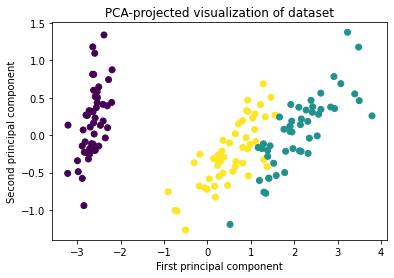

In [6]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA-projected visualization of dataset")
plt.show()

### 1.2.1

Let's combine virginica and versicolor into class `-1`, and use setosa as class `1`.

In [7]:
iris["label"] = iris.apply(lambda x: 1 if x[4] == "Iris-setosa" else -1, axis=1)
y = np.expand_dims(iris["label"].to_numpy(), 0)

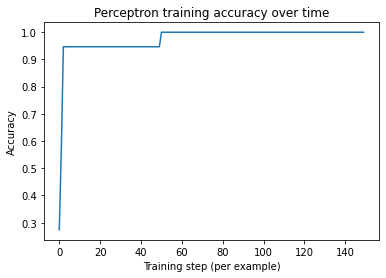

1

In [8]:
from perceptron import Perceptron
p = Perceptron(x.shape[0])
p.train(x, y, pca, epochs=1, lr=1e-1)

### 1.2.2

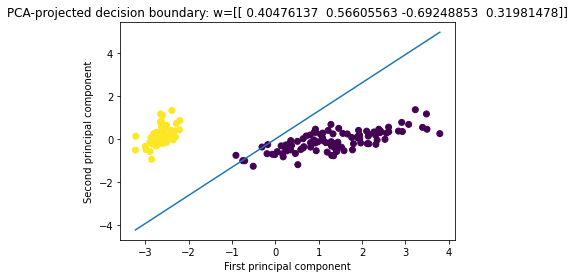

In [9]:
weight_parallel = p.get_parallel_w(pca)

x_reduced = pca.transform(x.T)
line_x = np.linspace(np.min(x_reduced), np.max(x_reduced))
line_y = line_x * weight_parallel[1] / weight_parallel[0]

plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y)
plt.plot(line_x, line_y)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title(f"PCA-projected decision boundary: w={p.w}")
plt.show()

Note that the decision boundary, when projected from 4D -> 2D using PCA, may not separate the point clouds exactly. We _could_ first PCA then find a 2D hyperplane to have perfect two-dimensional separability, but that isn't the point of this problem. The plot above is just for rough visualization.

### 1.3

Text(0.5, 1.0, 'Effect of LR on convergence speed')

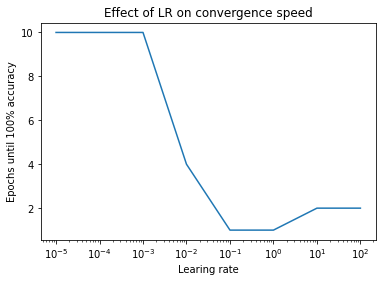

In [10]:
lrs = [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epochs = [p.train(x, y, pca, epochs=10, lr=lr, plot_progress=False) for lr in lrs]
plt.plot(lrs, epochs)
plt.xscale("log")
plt.xlabel("Learing rate")
plt.ylabel("Epochs until 100% accuracy")
plt.title("Effect of LR on convergence speed")

### 1.4

### 1.5

## Problem 2

In [11]:
# pretty straightforward

## Problem 3

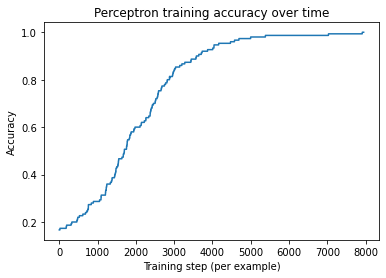

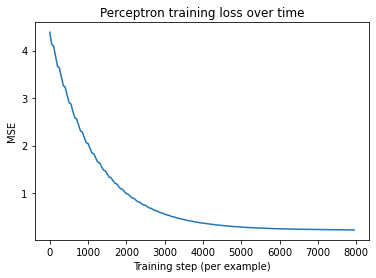

53

In [28]:
from perceptron import Perceptron
p = Perceptron(x.shape[0], is_adaline=True)
p.train(x, y, pca, epochs=100, lr=1e-4)